In [824]:
import numpy as np
import pandas as pd

from PIL import Image
import glob

np.set_printoptions(precision=3)


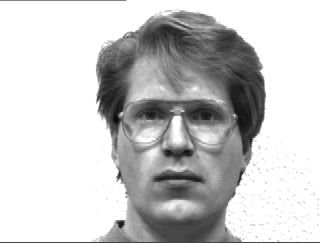

In [25]:

gif = Image.open("data/yalefaces/subject01.glasses.gif")
gif

In [128]:
def downsample(gif): 
    return np.array(gif)[::4, ::4]

def center(M):
    M1 = M.copy()
    meanpoint = M1.mean(axis=0)
    
    M1 = M1 - meanpoint
    
    return M1

## Read in all the images

All the images will be stored in a matrix, after downsampling. The final matrix is centered on the mean

In [213]:
yalefaces = glob.glob("data/yalefaces/*")

yale01 = [x for x in yalefaces if "01" in x and "test" not in x]
yale02 = [x for x in yalefaces if "02" in x and "test" not in x]

In [230]:
def gif_array(path):
    
    gif = Image.open(path)
    gif = downsample(gif)
    
    return gif.flatten()
    

In [889]:
yale01_mat = []
for i in yale01:
    yale01_mat.append(gif_array(i))
yale_01_mat = np.array(yale01_mat)

yale02_mat = []
for i in yale02:
    yale02_mat.append(gif_array(i))
yale_02_mat = np.array(yale02_mat)

## Class for Q2

In [890]:
class Eigenface:
    
    def __init__(self, matrix_all, yaleface="01"):
        self.matrix_all = self.center_m(matrix_all)
        self.yaleface = yaleface
        
    def center_m(self, m):
        
        return m - m.mean(axis=0) 
        
    def cov_m(self):
        
        covariance_matrix = ((self.matrix_all).T @ (self.matrix_all)) / 1
        
        self.cov_matrix = covariance_matrix
    
    def svd(self):
        u, s, vt = np.linalg.svd(self.cov_matrix)
        
        self.u = u
        self.s = s
        self.vt = vt
    
    def eigen_vector(self, k):
        
        return self.vt.T[:, k].reshape(61, 80)
    
    
    def image_show(self, k):
        
        vec = self.eigen_vector(k)
        
        return plt.imshow(vec, cmap='bone')
    
    def image_save(self, k):
        
        vec = self.eigen_vector(k)
        
        plt.imsave(f"img/face{self.yaleface}_{k+1}_vector.png", vec, cmap='bone')
        


In [891]:
face1 = Eigenface(yale_01_mat)
face1.cov_m()
face1.svd()

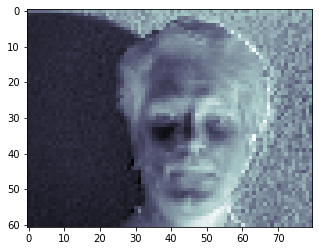

In [892]:
face1.image_show(0)

#### Save all the images

In [900]:
for i in range(6):
    face1.image_save(i)

In [893]:
face2 = Eigenface(yale_02_mat, yaleface="02")
face2.cov_m()
face2.svd()

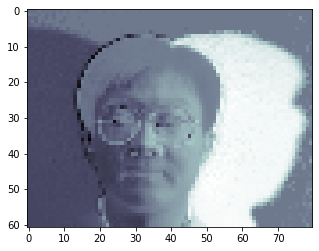

In [894]:
face2.image_show(0)

In [901]:
for i in range(6):
    face2.image_save(i)

# Part B

Face recognition

In [902]:
face1.cov_matrix.shape

(4880, 4880)

In [903]:
face1.u.shape

(4880, 4880)

In [904]:
eig_vec = face1.eigen_vector(0).flatten().reshape(4880, 1)

In [980]:
test01 = gif_array("data/yalefaces/subject01-test.gif")
test01 = test01 - face1.matrix_all.mean(axis=0)


test02 = gif_array("data/yalefaces/subject02-test.gif")
test02 = test02 - face2.matrix_all.mean(axis=0)

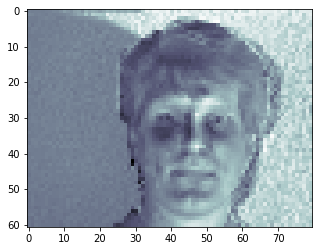

In [991]:
eig_vec = face1.eigen_vector(k).flatten().reshape(4880, 1)
plt.imshow( (test01 - ( eig_vec @ ( np.inner(eig_vec.T, test01)) ) ).reshape(61, 80), cmap='bone')

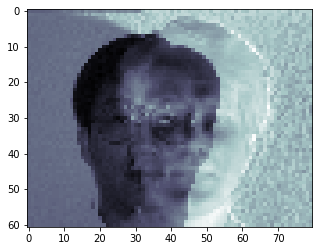

In [992]:
eig_vec = face1.eigen_vector(k).flatten().reshape(4880, 1)
plt.imshow( (test02 - ( eig_vec @ ( np.inner(eig_vec.T, test02)) ) ).reshape(61, 80), cmap='bone')

#### $s_{11}$

In [985]:
k = 0
eig_vec = face1.eigen_vector(k).flatten().reshape(4880, 1)
x11 = test01 - ( eig_vec @ ( np.inner(eig_vec.T, test01)) )
x11 = np.linalg.norm(x11) ** 2

round(x11, 2)

49933494.12

#### $s_{12}$

In [986]:
eig_vec = face1.eigen_vector(k).flatten().reshape(4880, 1)
x12 = test02 - ( eig_vec @ ( np.inner(eig_vec.T, test02)) )
x12 = np.linalg.norm(x12) ** 2

round(x12, 2)

113948550.41

#### $s_{22}$

In [987]:
eig_vec = face2.eigen_vector(k).flatten().reshape(4880, 1)
x22 = test02 - ( eig_vec @ ( np.inner(eig_vec.T, test02)) )
x22 = np.linalg.norm(x22) ** 2

round(x22, 2)


181971406.02

#### $s_{21}$

In [988]:
eig_vec = face2.eigen_vector(k).flatten().reshape(4880, 1)
x21 = test01 - ( eig_vec @ ( np.inner(eig_vec.T, test01)) )
x21 = np.linalg.norm(x21) ** 2

round(x21, 2)

199761842.7

In [989]:
x21 > x22


True

In [990]:
x12 > x11

True

In [965]:
sorted(face1.s, reverse = True) == face1.s

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

# 4. PCA: Food consuption in European countries

In [1044]:
df = pd.read_csv("data/food-consumption.csv")

In [1045]:
df.shape

(16, 21)

In [999]:
A = df.drop('Country', axis=1).values

In [1054]:
def scale(m):
    
    N = len(m)
    
    y = m - np.ones((N, 1)) * m.mean(axis=0)
    y = y*(1/np.std(y, 0))
    
    return y
    
    return (m - np.min(m)) / (np.max(m) - np.min(m))

In [1055]:
A_scaled = scale(A)

In [1056]:
u, s, vt = np.linalg.svd(A_scaled)

In [1057]:
def recreate_matrix(data, n=2):
    
    u, s, vt = np.linalg.svd(data)
    
    return u[:, :n] @ (vt.T[:, :n] @ ( np.diag(s[:n]) / np.std(s[:n]) )).T


In [1058]:
u[:, :2].shape

(16, 2)

In [1059]:
d = ( u[:, :2] @(np.diag(s[:2]) @ vt[:, :2].T) )

In [1060]:
df2 = pd.DataFrame(d, columns = ['V' + str(x) for x in range(20)])
df2['Country'] = df.Country

In [1061]:
from plotnine import ggplot, geom_point, aes, geom_text

In [1063]:
(ggplot(df2, aes('V0', 'V1')) +
 geom_point() +
 geom_text(aes(label='Country'))
).save('img/PCA_2.png')

/opt/homebrew/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/opt/homebrew/lib/python3.9/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: img/PCA_2.png
